<a href="https://colab.research.google.com/github/lucasjwiese/colabs/blob/main/Another_copy_of_ILS695_CTA_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 - Text Data Visualization (10 pts)
In this assignment, we will generate word data visualization using scientific bibliometric dataset. <br>
Bibliometrics is the use of statistical methods to analyse books, articles and other publications. Many research fields use bibliometric methods to explore the impact of their field, the impact of a set of researchers, the impact of a particular paper, or to identify particularly impactful papers within a specific field of research. Bibliometrics also has a wide range of other applications, such as in descriptive linguistics, the development of thesauri, and evaluation of reader usage. Ref: https://en.wikipedia.org/wiki/Bibliometrics

Tasks in assignment 3:


1.   Data acquisition - download bibliomatrics from Scopus (2 pts)
2.   Text data perparation - text pre-processing (2 pts)
3.   Data visualization - word cloud and network (4 pts)
4.   Keywords comparison and discussion (2 pts)






## Task 1: Data acquisition - download bibliometrics from Scopus (2pts) <br>
Go to the scopus database (https://www-scopus-com.ezproxy.lib.purdue.edu/search/form.uri?display=basic#basic ) and search a research topic in your discipline.
Export the bibliometrics as csv file. The data should include article abstract and key words. <br>
<br>

Note: limit your search on a specific topic in your discipline, and make sure the resulted articles less than 2000. Or you can't export all the data at once from scopus.
<br>
<br>
<b>Submission: the original csv file downloaded from Scopus </b>

### Upload your csv file to colab and read the data into pandas dataframe

In [ ]:
import pandas as pd

In [ ]:
# write your code here to read data into csv file

# scopus export on AI Safety Evaluation
AISE_df = pd.read_csv("scopus-export_AI-Safety-Evaluation.csv")
AISE_df.shape



(1666, 23)

In [ ]:
# write your code here to remove rows with No index keywords

AISE_df.dropna(subset=['Index Keywords'], inplace=True)
AISE_df.shape




(1267, 23)

## Task 2: Text data preparation - text pre-processing (2 pts) <br>
Apply text cleaning methods learned in class to lowercase texts, remove stopwords, and limmatize words. In this task, you will clean the 'Abstract' and 'Index Keywords' in the data.<br>
<br>

Note: do NOT remove special characters in keywords, or you will have trouble to create network using VOSviewer.
<br>
<br>
<b>Submission: write your code below</b>

## Text pre-processing

In [ ]:
# Need to import NLTK and specifically download three sublibraries.
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from pandas.core.arrays import string_
# Need to import particular functions from NLTK as well.

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
# Remove stopwords function.
##add customized stopwords
def remove_Stopwords(text ):
    mystopwords=['within','with']
    stop_words = set(stopwords.words('english')+ mystopwords)
    words = word_tokenize( text.lower() )
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)

# Lemmatize function.
def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer()
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist)

# Cleaning text function.
def clean_text(text ):
    delete_dict = {sp_character: '' for sp_character in string.punctuation}
    delete_dict[' '] = ' '
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr])

    return text2.lower()

In [ ]:
### Write your code here for Index Keyword cleaning
### Note: do NOT remove special characters in the cleaning (don't use the function clean_text)

AISE_df['Index Keywords'] = AISE_df['Index Keywords'].apply(lambda x: remove_Stopwords(x))
AISE_df['Index Keywords'] = AISE_df['Index Keywords'].apply(lambda x: lemmatize_text(x))




In [ ]:
### Write your code here for Abstract cleaning
### Note: remove special characters in this step

AISE_df['Abstract'] = AISE_df['Abstract'].apply(lambda x: clean_text(x))
AISE_df['Abstract'] = AISE_df['Abstract'].apply(lambda x: remove_Stopwords(x))
AISE_df['Abstract'] = AISE_df['Abstract'].apply(lambda x: lemmatize_text(x))



## Task 3: Data visualization - word cloud and network (4 pts) <br>
Save the cleaned text in csv and use VOSviewer to create Keywords Network<br>
Plot the top 50 words in 'Index Keywords' and 'Abstract' using wordcloud.<br>
<br>
Link to get VOSviewer: https://www.vosviewer.com/download
<br>
<br>

Note: apply manual adjustment on the word could if necessary. To do that please follow the example in week 11.
<br>
<br>
<b>Submission: write your code below, save and upload your VOSviewer network as photo format (like jpg or png)</b>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import string
from wordcloud import WordCloud

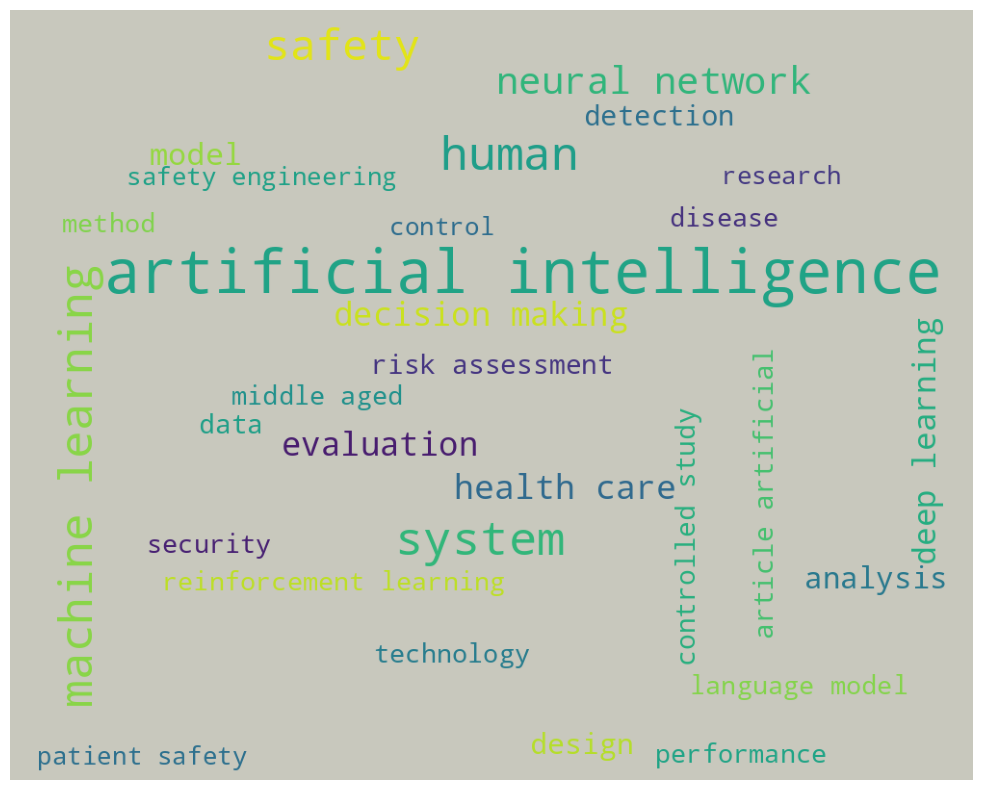

In [ ]:
##Write your world cloud code here (for Index Keywords)

wordcloud = WordCloud(background_color=(200,200,189),max_words=30, width=1000,random_state=130, height=800,stopwords=[''],collocations=True).generate(' '.join(AISE_df['Index Keywords'].tolist()))
plt.figure( figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


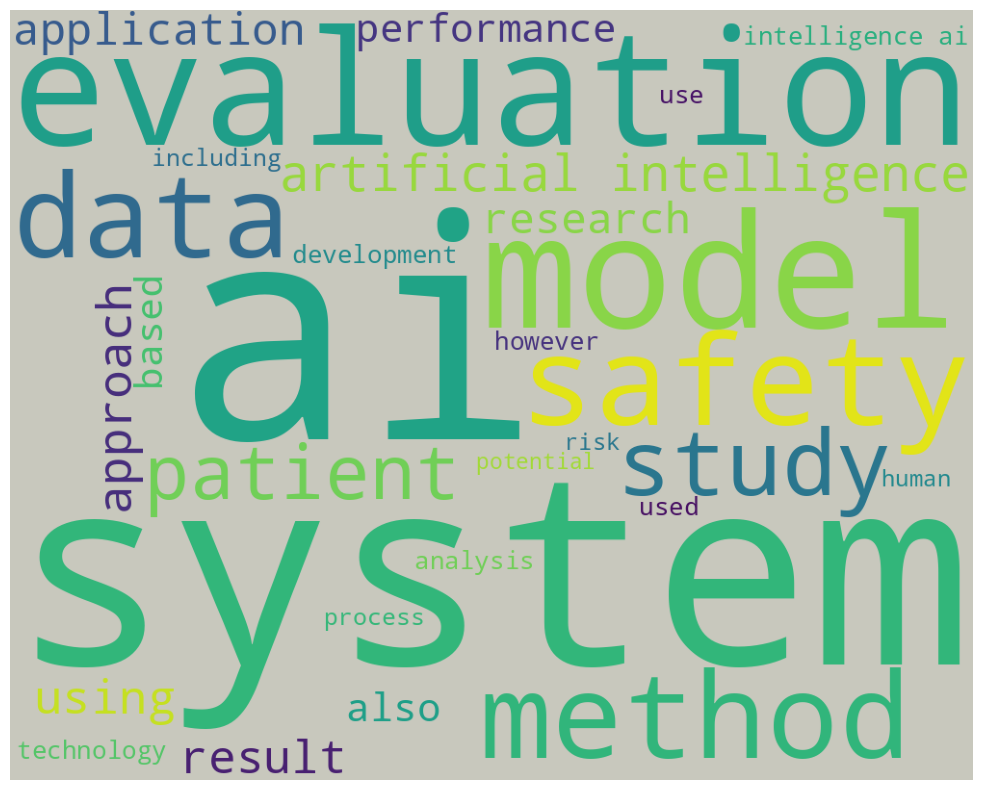

In [ ]:
##Write your world cloud code here (for Abstract)

wordcloud_abstract = WordCloud(background_color=(200,200,189),max_words=30, width=1000,random_state=130, height=800,stopwords=[''],collocations=True).generate(' '.join(AISE_df['Abstract'].tolist()))
plt.figure( figsize=(20,10))
plt.imshow(wordcloud_abstract)
plt.axis('off')
plt.show()


In [ ]:
##Save your cleaned text data as a csv file for VOSviewer
##wirte your save to csv code here

AISE_df.to_csv('AISE_df.csv')

# uploaded network visualization of All Keywords to Brightspace with submission

## Task 4: Keywords comparison and discussion (2 pts) <br>
Based on your wordcloud data created in task 3, print out the top 20 words in 'Abstract' and 'Index Keywords' and discuss the similarity and differences.<br>

<br>
<br>
<b>Submission: write your discussion below</b>

In [ ]:
for word, frequency in wordcloud.words_.items():
    print(f"{word}: {frequency}")

### shows already sorted in descending order

artificial intelligence: 1.0
system: 0.5703022339027596
human: 0.5545335085413929
machine learning: 0.5492772667542707
safety: 0.48751642575558474
neural network: 0.35611038107752957
health care: 0.28383705650459923
evaluation: 0.2614980289093298
decision making: 0.25624178712220763
deep learning: 0.2483574244415243
model: 0.240473061760841
analysis: 0.2233902759526938
design: 0.20630749014454666
detection: 0.19185282522996058
risk assessment: 0.18134034165571616
data: 0.1773981603153745
article artificial: 0.1773981603153745
controlled study: 0.17345597897503284
disease: 0.164257555847569
language model: 0.16031537450722733
method: 0.15505913272010513
performance: 0.15374507227332457
middle aged: 0.15374507227332457
technology: 0.1498028909329829
security: 0.14848883048620237
reinforcement learning: 0.14848883048620237
research: 0.14060446780551905
safety engineering: 0.14060446780551905
control: 0.13797634691195795
patient safety: 0.13272010512483573


In [ ]:
top_20_keywords = {word: frequency for word, frequency in list(wordcloud.words_.items())[:20]}
top_20_abstract = {word: frequency for word, frequency in list(wordcloud_abstract.words_.items())[:20]}

top_20_keywords_list = list(top_20_keywords.keys())
top_20_abstract_list = list(top_20_abstract.keys())

In [ ]:
print(top_20_keywords_list)
print(top_20_abstract_list)

['artificial intelligence', 'system', 'human', 'machine learning', 'safety', 'neural network', 'health care', 'evaluation', 'decision making', 'deep learning', 'model', 'analysis', 'design', 'detection', 'risk assessment', 'data', 'article artificial', 'controlled study', 'disease', 'language model']
['ai', 'system', 'evaluation', 'model', 'safety', 'method', 'data', 'study', 'patient', 'artificial intelligence', 'approach', 'using', 'result', 'application', 'research', 'performance', 'also', 'based', 'intelligence ai', 'however']


### Write your comparison here:


use 2-3 sentences to compare the top words in 'Abstract' and 'Index Keywords', and discuss which group better represents the research topic your searched

The keywords better represent the topic I researched. This is likely because the authors are very intentional with the keywords, whereas the abstract would require a lot more cleaning to remove words such as "method", "using", "also", etc. to get to the high information value words.

### Write your comments and suggestions on word cloud analysis here:
use another 2-3 sentence to discuss the limitations of the word could analysis and provide potential suggestions to improve it.

Word clouds do not provide the reader a lot of information beyond the top 2-3 words. It is often hard to distinguish what rank and relation words have to each other. It is also hard to make side-by-side comparisons since frequencies are scaled to the set of text it is ran on. Meaning, it is hard to compare frequencies between the keywords and abstract, and I'd suggest using a visualization, or just a table, to represent the top keywords present in both texts.